In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Exploración y comprensión de los datos

## EDA del dataset del ultimo anio

In [29]:
df_ly = pd.read_fwf("registro_temperatura365d_smn.txt", skiprows=1, encoding="latin1") #La primera linea esta en blanco (skiprows=1)
df_ly.head()

,FECHA,TMAX,TMIN,NOMBRE
0,--------,-----,-----,----------------------------------------
1,30032025,28.9,21.4,AEROPARQUE AERO
2,30032025,23.0,13.7,AZUL AERO
3,30032025,22.6,14.6,BAHIA BLANCA AERO
4,30032025,12.6,4.4,BARILOCHE AERO


Hay cuatro columnas en el dataset indicando fecha, temperatura maxima, temperatura minima y el nombre de la estacion.

## Características principales del dataset, número de observaciones, número de variables y tipos de datos.

In [30]:
print('Estadística descriptiva de las numéricas:\n')
df_ly.describe()

Estadística descriptiva de las numéricas:



,FECHA,TMAX,TMIN,NOMBRE
count,42916,38391,42296,42916
unique,366,668,590,119
top,31032024,29.0,15.0,AEROPARQUE AERO
freq,118,356,420,365


In [31]:
# Estadística descriptiva de las numéricas
print('Nro de obs nulas y no nulos, Nro de variables y tipos de datos:\n')
df_ly.info()

Nro de obs nulas y no nulos, Nro de variables y tipos de datos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42916 entries, 0 to 42915
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   FECHA   42916 non-null  object
 1   TMAX    38391 non-null  object
 2   TMIN    42296 non-null  object
 3   NOMBRE  42916 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


In [32]:
print('Valores unicos:\n')
df_ly.nunique()

Valores unicos:



FECHA     366
TMAX      668
TMIN      590
NOMBRE    119
dtype: int64

# Limpieza del dataset

## Reformateando variables numericas y categoricas

In [33]:
df_ly = pd.read_fwf("registro_temperatura365d_smn.txt", skiprows=1, encoding="latin1") #La primera linea esta en blanco (skiprows=1)
# Quitar filas que no tengan una fecha válida (por ejemplo, si tienen guiones)
df_ly = df_ly[df_ly['FECHA'].str.fullmatch(r"\d{8}")] # Filtrar fechas con formato de 8 dígitos (día-mes-año) 

df_ly['FECHA'] = pd.to_datetime(df_ly['FECHA'], format = '%d%m%Y') # Convertir a fecha con formato día-mes-año
df_ly['TMAX'] = pd.to_numeric(df_ly['TMAX'], errors='coerce') # Ignorar errores de conversión a numérico (por ejemplo, guiones)
df_ly['TMIN'] = pd.to_numeric(df_ly['TMIN'], errors='coerce') # Ignorar errores de conversión a numérico (por ejemplo, guiones)
df_ly['NOMBRE'] = df_ly['NOMBRE'].astype('category') # Convertir a categoría

df_ly.head()

,FECHA,TMAX,TMIN,NOMBRE
1,2025-03-30,28.9,21.4,AEROPARQUE AERO
2,2025-03-30,23.0,13.7,AZUL AERO
3,2025-03-30,22.6,14.6,BAHIA BLANCA AERO
4,2025-03-30,12.6,4.4,BARILOCHE AERO
5,2025-03-30,-10.3,-16.5,BASE BELGRANO II


## Checkeo de tipo de dato

In [34]:
print('Los nuevos tipos de datos son:\n')
df_ly.dtypes

Los nuevos tipos de datos son:



FECHA     datetime64[ns]
TMAX             float64
TMIN             float64
NOMBRE          category
dtype: object

## Estadistica descriptiva

In [35]:
print('Estadística descriptiva de las numéricas:\n')
df_ly.describe()

Estadística descriptiva de las numéricas:



,FECHA,TMAX,TMIN
count,42915,38390.000000,42295.000000
mean,2024-09-28 16:29:51.821041408,21.681586,9.731467
min,2024-03-31 00:00:00,-30.700000,-37.600000
25%,2024-06-29 12:00:00,15.700000,3.700000
50%,2024-09-29 00:00:00,22.800000,10.500000
75%,2024-12-29 00:00:00,29.200000,16.800000
max,2025-03-30 00:00:00,46.500000,30.800000
std,NaN,10.265127,8.924445


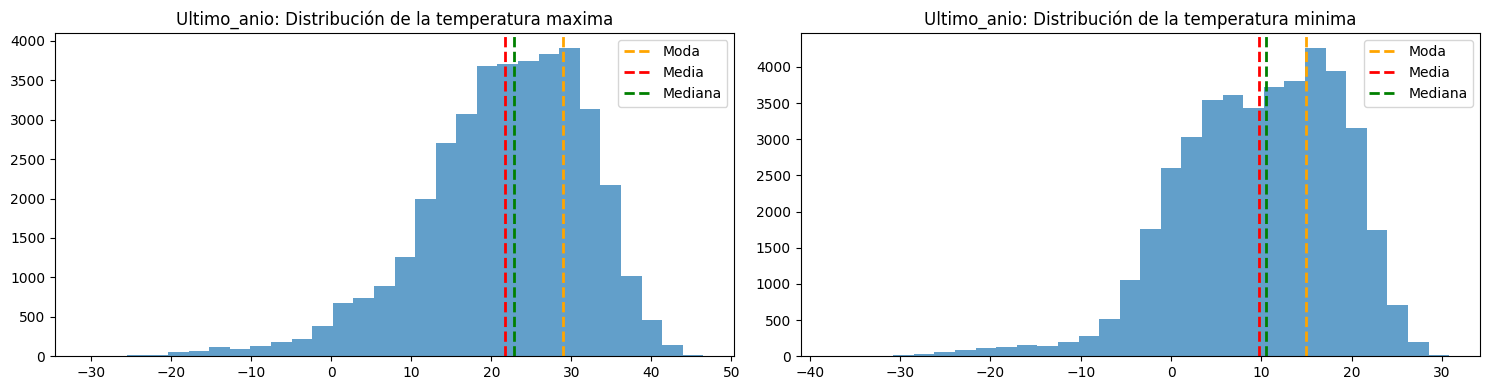

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Función para graficar
def plot_distribution(ax, data, title):
    ax.hist(data, bins=30, alpha=0.7) # dibujar histograma
    ax.axvline(data.mode()[0], color='orange', linestyle='dashed', linewidth=2, label='Moda') # dibujar la moda
    ax.axvline(data.mean(), color='red', linestyle='dashed', linewidth=2, label='Media') # dibujar la media
    ax.axvline(data.median(), color='green', linestyle='dashed', linewidth=2, label='Mediana') # dibujar la mediana
    ax.set_title(title)
    ax.legend()

plot_distribution(axes[0], df_ly['TMAX'], 'Ultimo_anio: Distribución de la temperatura maxima')
plot_distribution(axes[1], df_ly['TMIN'], 'Ultimo_anio: Distribución de la temperatura minima')
#plot_distribution(axes[2], df['sibsp'], 'Titanic: Distribución familiares (SibSp)')

plt.tight_layout()
plt.show()

parecen distribuciones normales, estan ligeramente sesgadas a la derecha (negativa). Se presentan outliers en temperaturas bajo cero, almenos, visualmente.

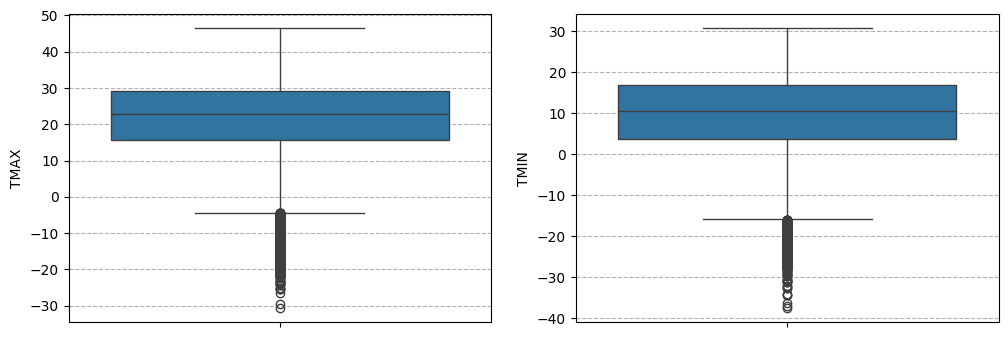

In [37]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))

# ejemplo:
sns.boxplot(data=df_ly, y='TMAX', ax=ax[0])
sns.boxplot(data=df_ly, y='TMIN', ax=ax[1])

ax[0].grid(axis='y', ls='--')
ax[1].grid(axis='y', ls='--')
#plt.legend(title='pclass', loc='upper right')

plt.show()

Como se esperaba, hay muchos outliers en el caso de tmax por debajo de -5 grados y en el caso de tmin por debajo de -18 grados.

<Axes: >

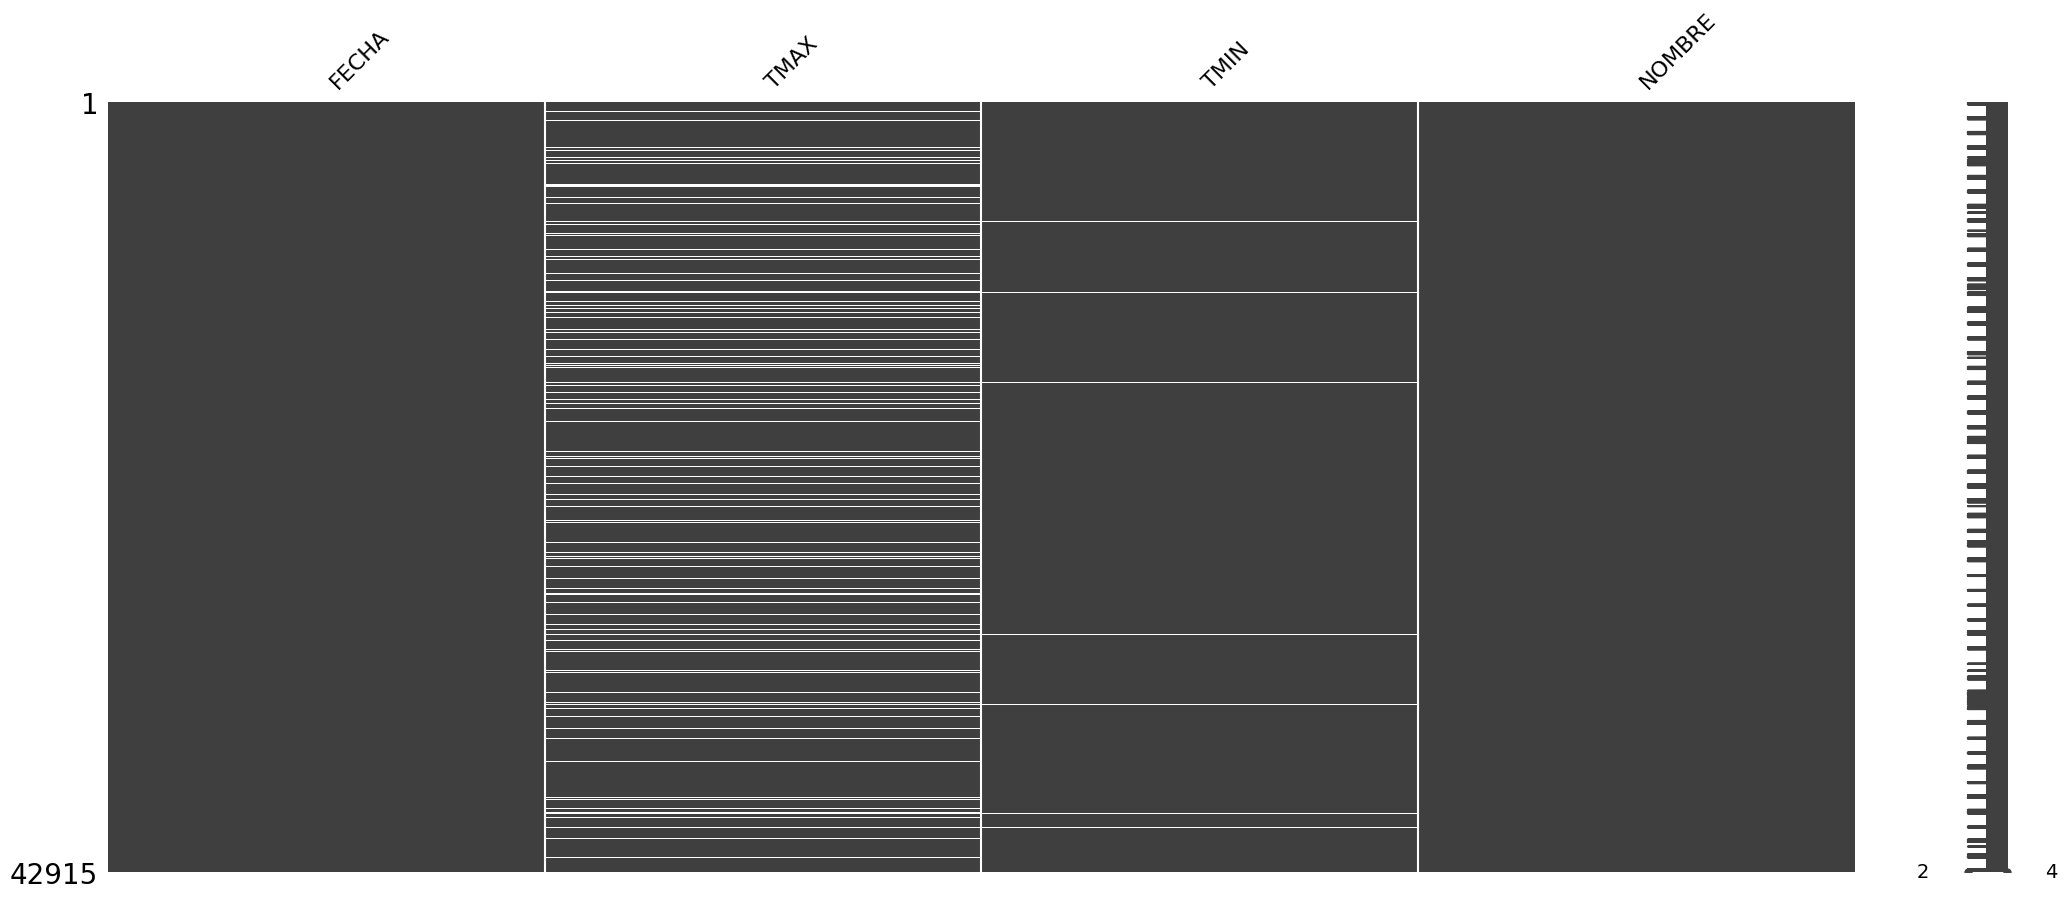

In [38]:
# Matriz de valores faltantes
msno.matrix(df_ly)

In [39]:
print(f"Valores faltantes: {df_ly.isnull().sum()}")  # Calcular valores faltantes

Valores faltantes: FECHA        0
TMAX      4525
TMIN       620
NOMBRE       0
dtype: int64


In [48]:
# Calcular la proporción de valores nulos en la columna TMAX
proporcion_nulos = df_ly['TMAX'].isnull().sum() / len(df_ly)
print(f"Proporción de valores nulos en TMAX: {proporcion_nulos*100:.02f}%")
proporcion_nulos = df_ly['TMIN'].isnull().sum() / len(df_ly)
print(f"Proporción de valores nulos en TMIN: {proporcion_nulos*100:.02f}%")
print('\n\nSe justifica eliminar las filas con valores nulos ya que son pocos?')

Proporción de valores nulos en TMAX: 10.54%
Proporción de valores nulos en TMIN: 1.44%


Se justifica eliminar las filas con valores nulos ya que son pocos?


In [25]:
df_ly = df_ly.dropna()  # Elimina filas con valores faltantes

<Axes: >

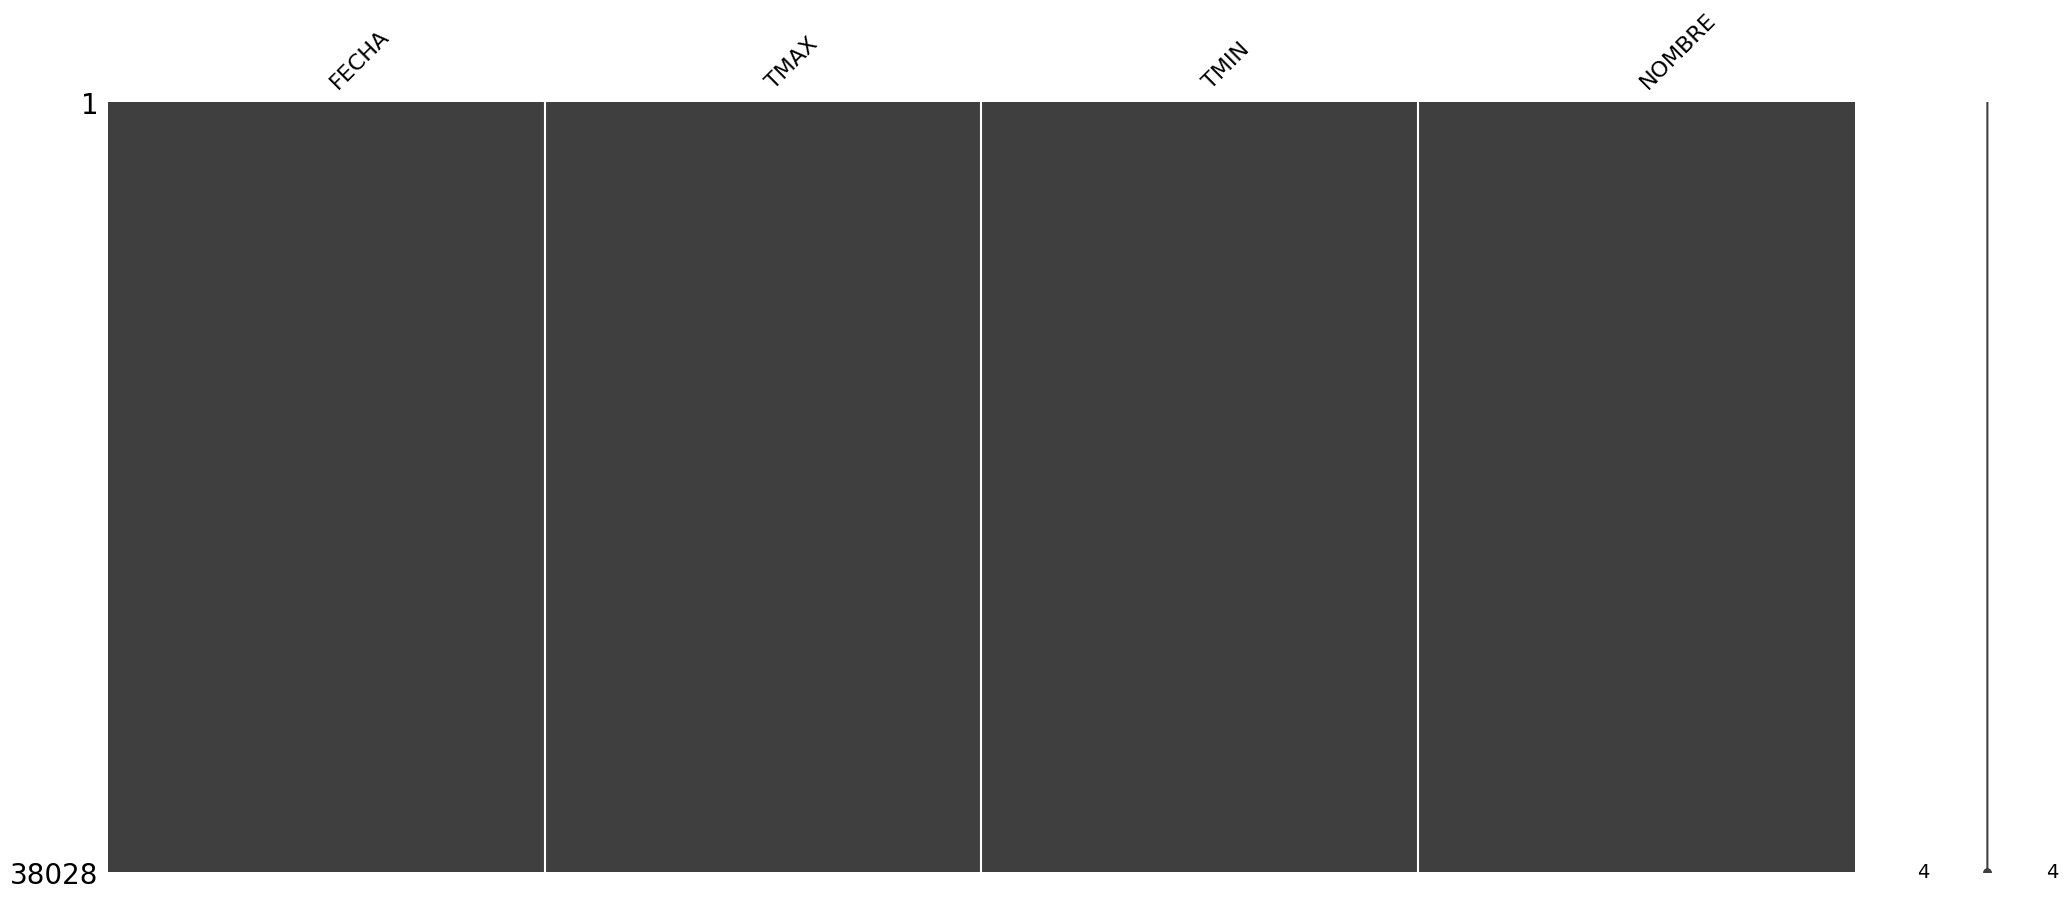

In [26]:
# Matriz de valores faltantes
msno.matrix(df_ly)

## EDA del dataset del 1991 - 2020

In [49]:
df_30 = pd.read_csv("Estadísticas normales Datos abiertos 1991-2020.txt", sep="\t", skiprows=7, encoding="latin1")
df_30 = df_30.dropna(axis=1, how="all")
for col in df_30.columns:
    if col not in ['Estación', 'Valor Medio de']:  # columnas que querés dejar como texto
        df_30[col] = pd.to_numeric(df_30[col], errors='coerce')


df_30.head(16)

,Estación,Valor Medio de,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,LA QUIACA OBSERVATORIO,Temperatura (°C),13.2,13.0,12.8,11.3,7.3,4.8,4.5,7.0,10.0,12.4,13.4,13.9
1,LA QUIACA OBSERVATORIO,Temperatura máxima (°C),20.6,20.4,20.6,20.3,17.8,16.3,16.1,18.0,20.0,21.7,22.5,22.2
2,LA QUIACA OBSERVATORIO,Temperatura mínima (°C),7.7,7.6,6.6,3.1,-2.5,-5.7,-6.2,-4.0,-0.4,3.3,5.5,7.3
3,LA QUIACA OBSERVATORIO,Humedad relativa (%),62.6,63.2,60.3,46.0,32.6,27.4,25.7,26.7,32.1,42.4,48.6,55.8
4,LA QUIACA OBSERVATORIO,Velocidad del Viento (km/h) (2011-2020),6.5,6.8,6.7,5.5,4.8,5.5,5.9,6.7,7.9,7.9,7.7,7.1
5,LA QUIACA OBSERVATORIO,Nubosidad total (octavos),4.9,4.7,3.7,2.3,1.6,1.4,1.3,1.3,1.8,2.6,3.1,4.1
6,LA QUIACA OBSERVATORIO,Precipitación (mm),101.9,67.9,48.1,6.8,1.1,0.0,0.0,1.2,3.9,14.4,22.2,63.2
7,LA QUIACA OBSERVATORIO,Frecuencia de días con Precipitación superior ...,11.5,9.2,6.8,1.4,0.2,0.0,0.0,0.2,0.6,2.3,3.8,8.6
8,ORÁN AERO*,Temperatura (°C),26.4,25.4,23.9,21.3,18.1,15.6,14.9,17.6,21.0,24.5,25.5,26.4
9,ORÁN AERO*,Temperatura máxima (°C),32.8,31.4,29.4,26.5,23.4,21.6,22.4,26.2,29.4,31.8,32.4,33.2


In [52]:
df_30.dtypes, df_30.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Estación        784 non-null    category
 1   Valor Medio de  784 non-null    category
 2   Ene             711 non-null    float64 
 3   Feb             708 non-null    float64 
 4   Mar             715 non-null    float64 
 5   Abr             717 non-null    float64 
 6   May             718 non-null    float64 
 7   Jun             717 non-null    float64 
 8   Jul             699 non-null    float64 
 9   Ago             706 non-null    float64 
 10  Sep             716 non-null    float64 
 11  Oct             716 non-null    float64 
 12  Nov             715 non-null    float64 
 13  Dic             717 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 78.3 KB


(Estación          category
 Valor Medio de    category
 Ene                float64
 Feb                float64
 Mar                float64
 Abr                float64
 May                float64
 Jun                float64
 Jul                float64
 Ago                float64
 Sep                float64
 Oct                float64
 Nov                float64
 Dic                float64
 dtype: object,
 None)

In [56]:
# Convertir columnas de texto a tipo categoría
df_30['Estación'] = df_30['Estación'].astype('category')
df_30['Valor Medio de'] = df_30['Valor Medio de'].astype('category')

# Transformar al formato largo
df_largo = df_30.melt(id_vars=['Estación', 'Valor Medio de'], var_name='Mes', value_name='Valor')

df_largo.head(20)

,Estación,Valor Medio de,Mes,Valor
0,LA QUIACA OBSERVATORIO,Temperatura (°C),Ene,13.2
1,LA QUIACA OBSERVATORIO,Temperatura máxima (°C),Ene,20.6
2,LA QUIACA OBSERVATORIO,Temperatura mínima (°C),Ene,7.7
3,LA QUIACA OBSERVATORIO,Humedad relativa (%),Ene,62.6
4,LA QUIACA OBSERVATORIO,Velocidad del Viento (km/h) (2011-2020),Ene,6.5
5,LA QUIACA OBSERVATORIO,Nubosidad total (octavos),Ene,4.9
6,LA QUIACA OBSERVATORIO,Precipitación (mm),Ene,101.9
7,LA QUIACA OBSERVATORIO,Frecuencia de días con Precipitación superior ...,Ene,11.5
8,ORÁN AERO*,Temperatura (°C),Ene,26.4
9,ORÁN AERO*,Temperatura máxima (°C),Ene,32.8


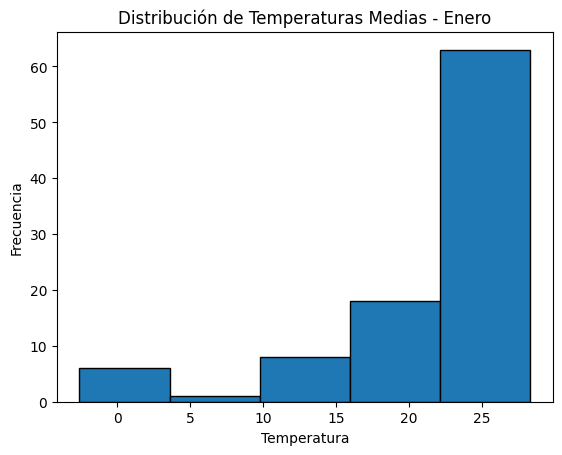

In [61]:
# Por ejemplo: histograma de temperaturas medias en enero
df_temp_ene = df_largo[(df_largo['Valor Medio de'] == 'Temperatura (°C)') & (df_largo['Mes'] == 'Ene')]

plt.hist(df_temp_ene['Valor'], bins=5, edgecolor='black')
plt.title('Distribución de Temperaturas Medias - Enero')
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.show()


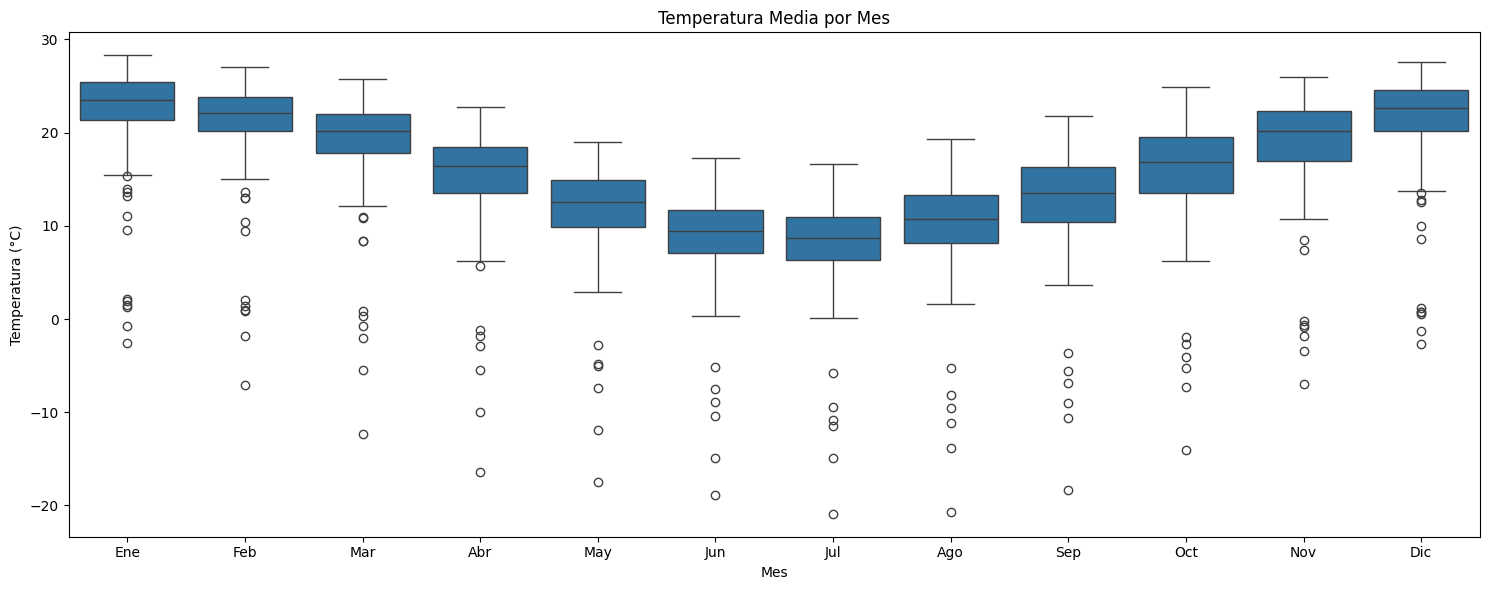

In [64]:
df_temp = df_largo[df_largo['Valor Medio de'] == 'Temperatura (°C)']

plt.figure(figsize=(15,6))
sns.boxplot(data=df_temp, x='Mes', y='Valor')
plt.title('Temperatura Media por Mes')
plt.xlabel('Mes')
plt.ylabel('Temperatura (°C)')
plt.tight_layout()
plt.show()


C:\Users\Juan\AppData\Local\Temp\ipykernel_16212\4074598318.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_grouped.groupby(['Estación', 'Mes'])['Valor'].mean().reset_index()
C:\Users\Juan\AppData\Local\Temp\ipykernel_16212\4074598318.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


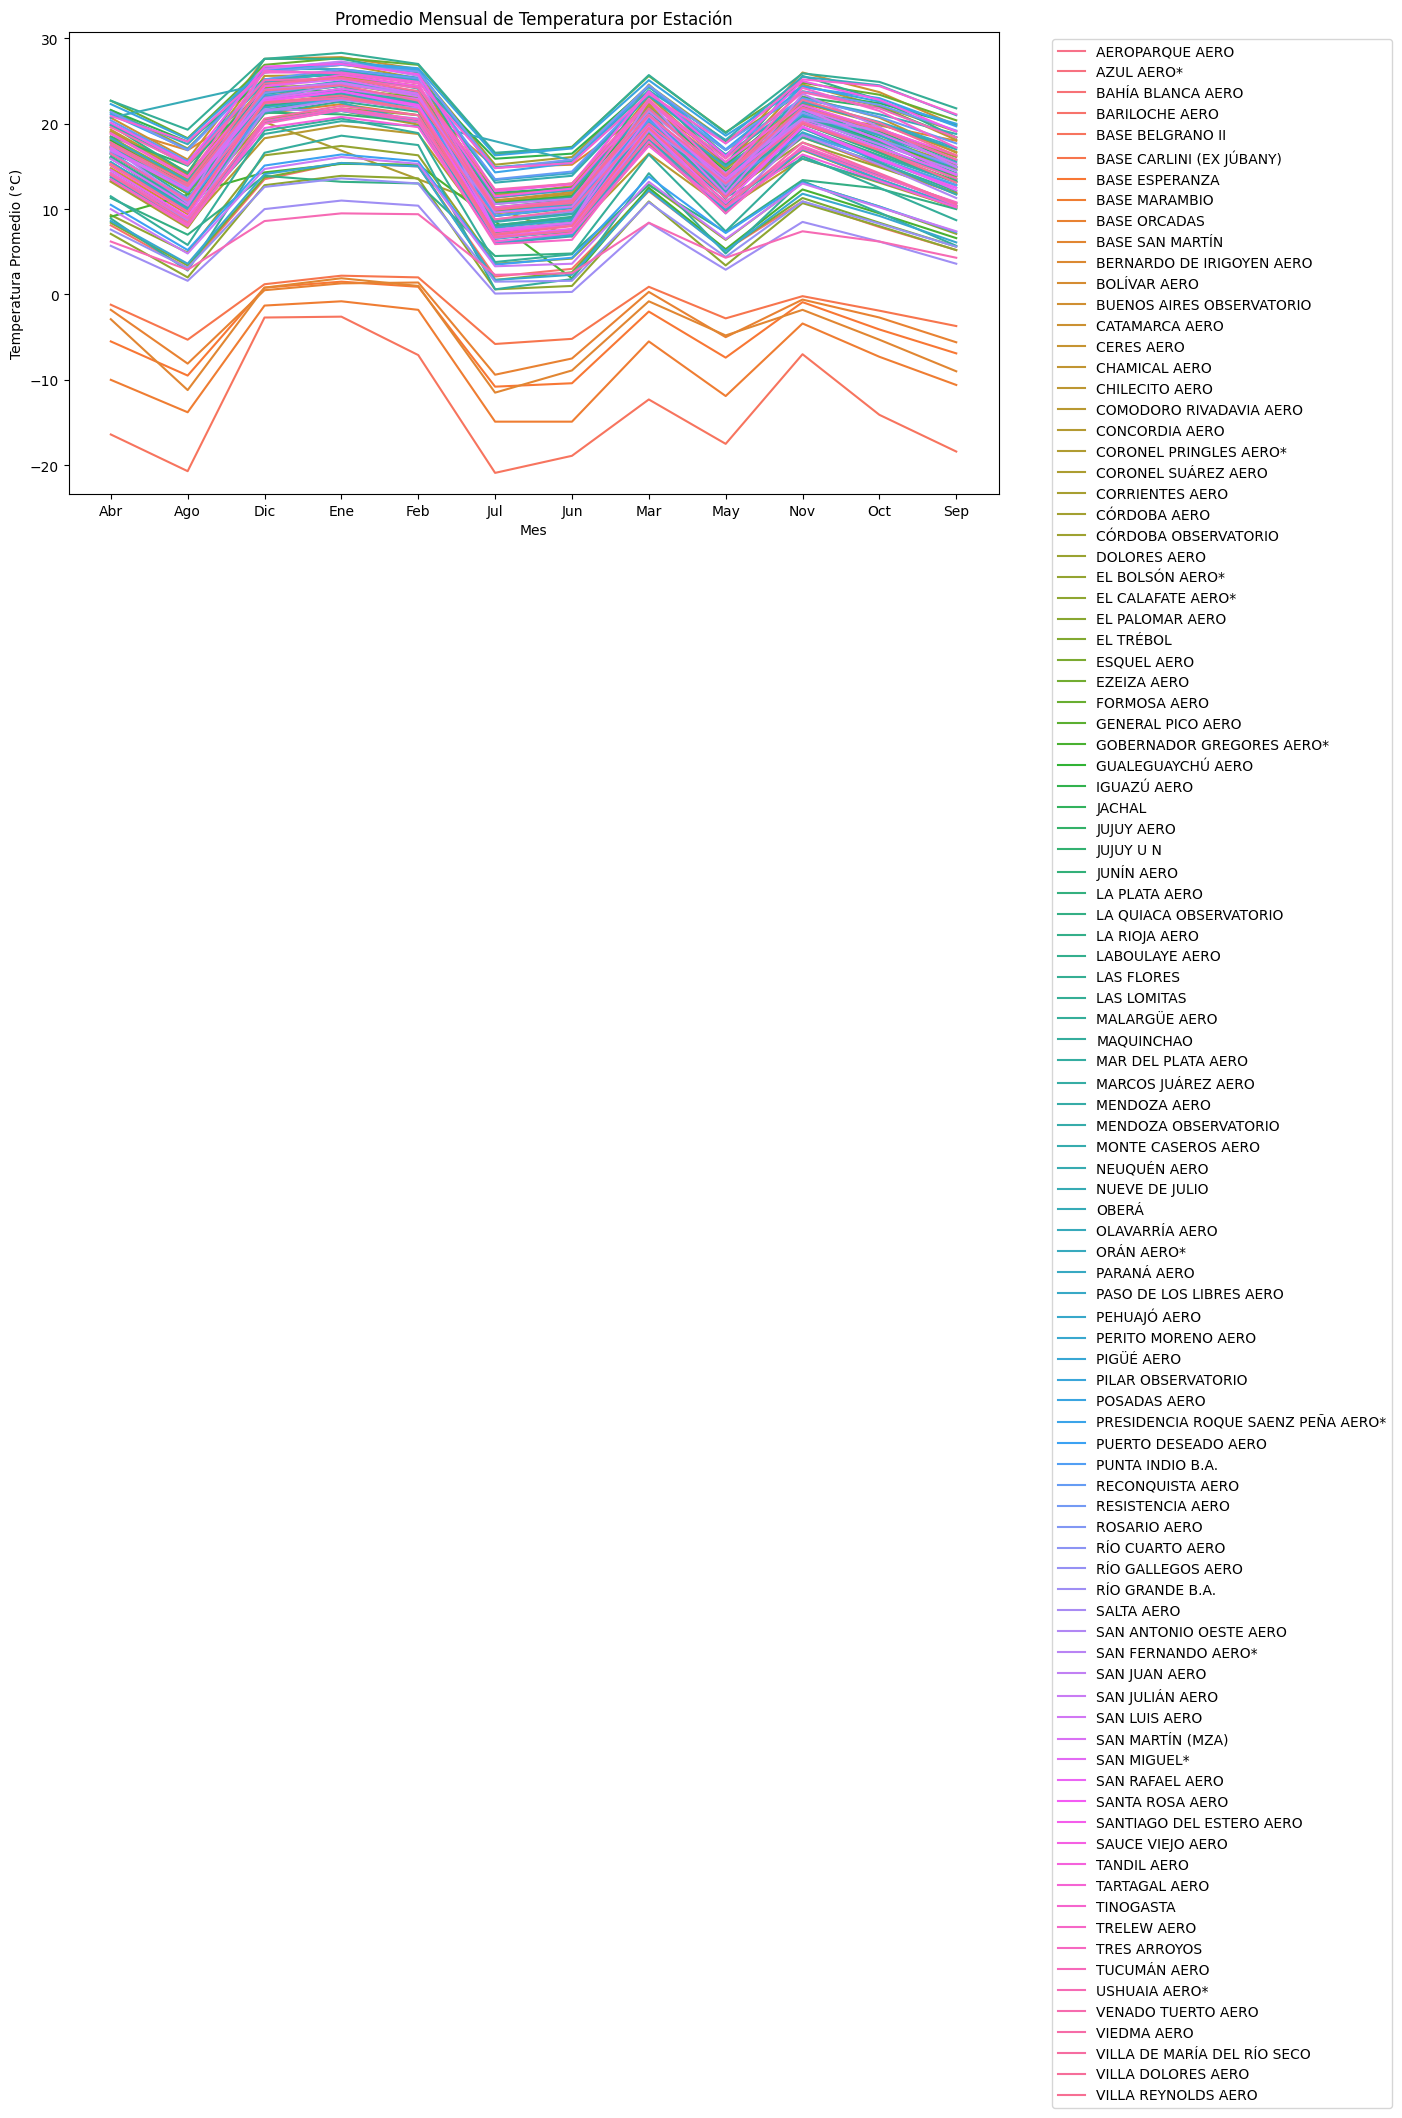

In [66]:
df_grouped = df_largo[df_largo['Valor Medio de'] == 'Temperatura (°C)']
df_grouped = df_grouped.groupby(['Estación', 'Mes'])['Valor'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=df_grouped, x='Mes', y='Valor', hue='Estación')
plt.title('Promedio Mensual de Temperatura por Estación')
plt.xlabel('Mes')
plt.ylabel('Temperatura Promedio (°C)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


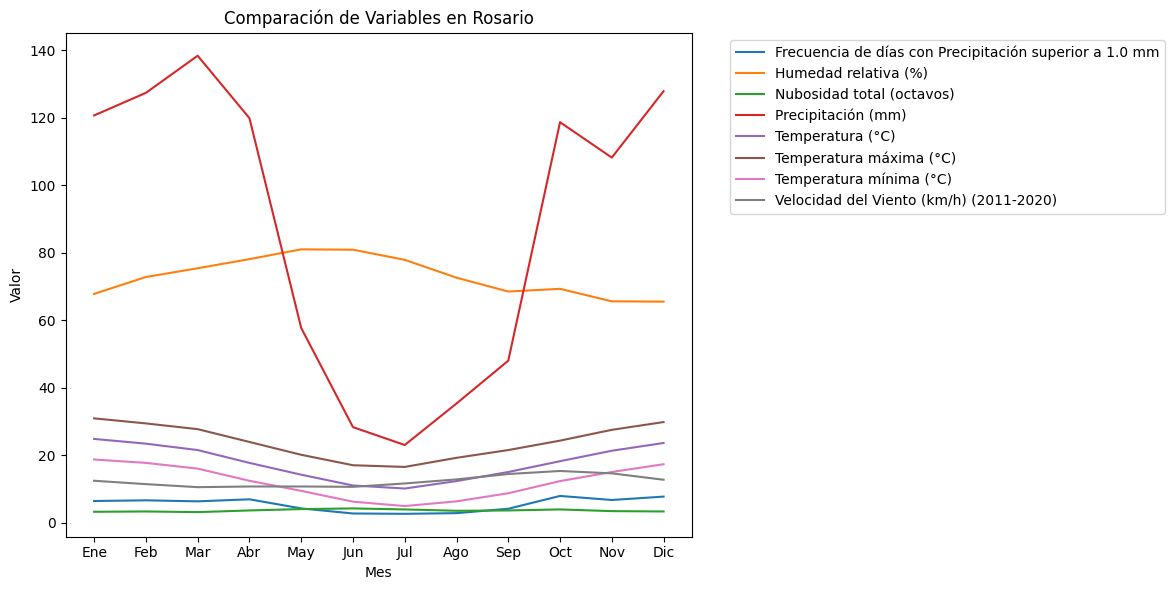

In [67]:
df_rosario = df_largo[df_largo['Estación'] == 'ROSARIO AERO']

plt.figure(figsize=(12,6))
sns.lineplot(data=df_rosario, x='Mes', y='Valor', hue='Valor Medio de')
plt.title('Comparación de Variables en Rosario')
plt.xlabel('Mes')
plt.ylabel('Valor')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\Juan\AppData\Local\Temp\ipykernel_16212\3311321821.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df_largo[df_largo['Valor Medio de'] == 'Temperatura (°C)'].pivot_table(


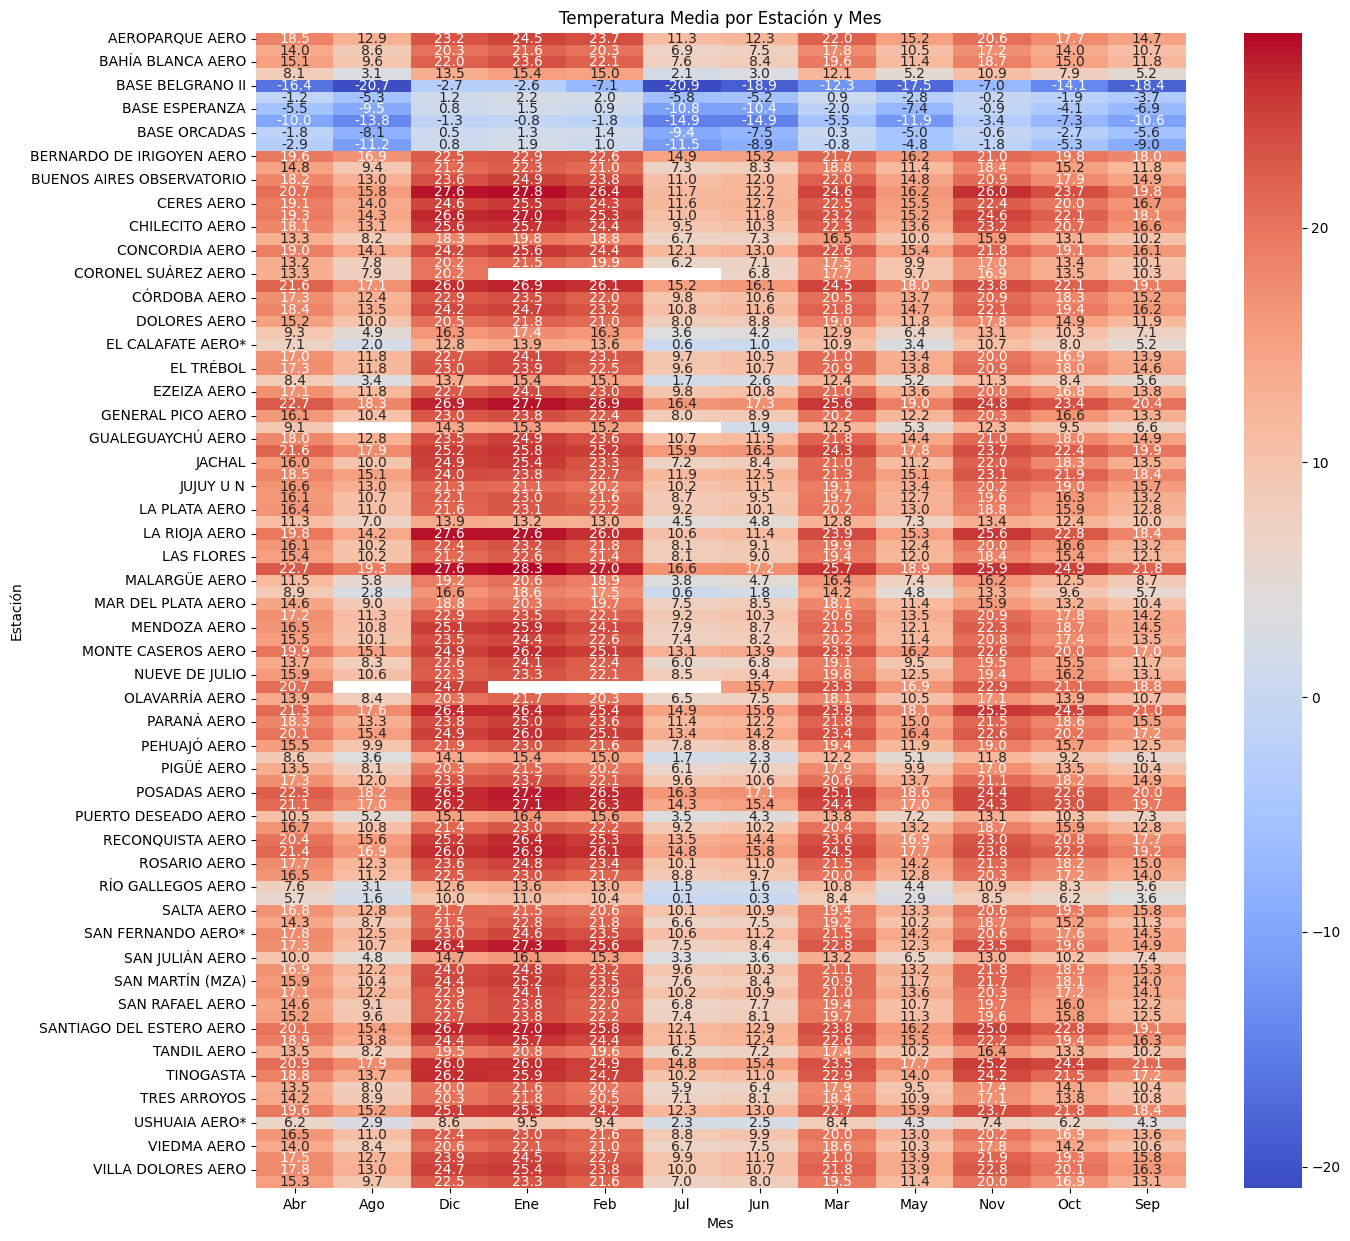

In [69]:
pivot = df_largo[df_largo['Valor Medio de'] == 'Temperatura (°C)'].pivot_table(
    index='Estación', columns='Mes', values='Valor', aggfunc='mean'
)

plt.figure(figsize=(15,15))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt='.1f')
plt.title('Temperatura Media por Estación y Mes')
plt.xlabel('Mes')
plt.ylabel('Estación')
plt.show()
